In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import gc

In [413]:
def_func = lambda a: lambda x: x**3 - a*x

In [4]:
n = 2100
seed = 23497

a = 70

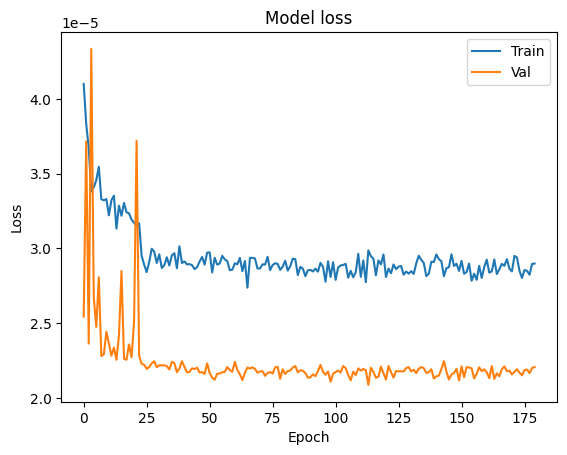

Test RMSE: 5.170652059326769
CPU times: user 3min 55s, sys: 41.1 s, total: 4min 36s
Wall time: 3min 8s


In [6]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                no_use_nn=True) # just to run it faster

In [340]:
x_pred_test = []
y_pred_test = []
x_mse_test = []
x_mse_test_back_to_y = []
x_mse_test_min_clusters = []

y_news = tnnr_nn_test_64_fnorm.y_test_single
y_nn_indexes = tnnr_nn_test_64_fnorm.get_nearest_neighbors(y_news.reshape(-1, 1), 
                                                           tnnr_nn_test_64_fnorm.y_train_single.reshape(-1, 1),
                                                           1) # one neighbor

y_nn_indexes

array([[ 489],
       [ 634],
       [1064],
       [ 718],
       [1197],
       [ 958],
       [ 526],
       [ 528],
       [ 276],
       [  25],
       [  54],
       [1194],
       [ 467],
       [ 346],
       [ 342],
       [ 689],
       [ 751],
       [ 772],
       [ 363],
       [ 921],
       [1223],
       [ 671],
       [ 439],
       [ 905],
       [ 971],
       [ 661],
       [  55],
       [ 934],
       [ 308],
       [ 889],
       [ 305],
       [1099],
       [ 907],
       [1223],
       [ 144],
       [1146],
       [1243],
       [  94],
       [ 154],
       [ 303],
       [ 300],
       [ 823],
       [ 756],
       [ 241],
       [ 948],
       [ 728],
       [ 641],
       [ 369],
       [ 781],
       [1035],
       [1209],
       [1092],
       [1142],
       [ 351],
       [ 993],
       [1140],
       [ 201],
       [  97],
       [1097],
       [1153],
       [  78],
       [ 631],
       [ 824],
       [ 517],
       [ 819],
       [ 491],
       [10

In [341]:
# for y_new_index in (range(len(y_news))):  # for each y_new

y_new_index = 0

y_nn = tnnr_nn_test_64_fnorm.y_train_single[y_nn_indexes[y_new_index]]  # y_new neighbors (y-space)
x_nn = tnnr_nn_test_64_fnorm.x_train_single[y_nn_indexes[y_new_index]]

In [342]:
y_nn

array([0.75548472])

In [412]:
tnnr_nn_test_64_fnorm.y_test_single[y_new_index]

0.7557020427775977

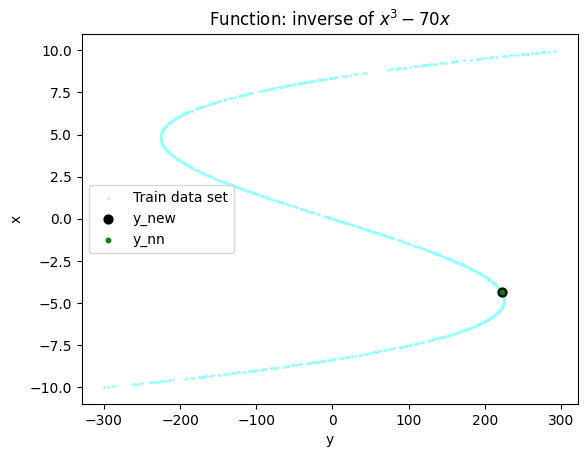

In [411]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single),
            label='Train data set', s=1, c='#99ffff')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_test_single[y_new_index]),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_test_single[y_new_index]),
            label='y_new', s=40, c='black')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=10, c='green')

plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

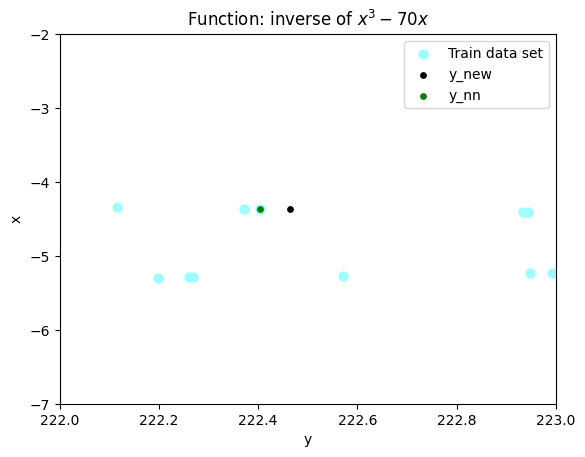

In [344]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single),
            label='Train data set', s=40, c='#99ffff')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_test_single[y_new_index]),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_test_single[y_new_index]),
            label='y_new', s=15, c='black')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=15, c='green')

plt.xlim([222, 223])
plt.ylim([-7, -2])
plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [345]:
x_mse_test_per_cluster = []

In [346]:
# for i in range(len(y_nn)):  # for each neighbor in y-space, y_nni = y_nn[i]
i = 0

In [347]:
# get neighbors of the corresponding x_nni = x_nn[i]

#x_nni_nn_indexes = self.get_nearest_neighbors_radius(x_nn[i].reshape(-1, 1), self.x_train_single,
#                                                     self.radius_nn_predict)

# get only one neighbor in x-space also
x_nni_nn_indexes = tnnr_nn_test_64_fnorm.get_nearest_neighbors(x_nn[i].reshape(-1, 1),
                                                               tnnr_nn_test_64_fnorm.x_train_single,
                                                               1+1) # one neighbor

x_nni_nn = tnnr_nn_test_64_fnorm.x_train_single[x_nni_nn_indexes[0]]compare with the x_new_true but transformed back  # anchors (orange circle), but itself
y_nni_nn = tnnr_nn_test_64_fnorm.y_train_single[x_nni_nn_indexes[0]][1:]
                                                                          # CAMBIO!!! -> [1:] ######################
x_nni_nn_indexes

array([[489, 678]])

In [348]:
x_nni_nn

array([[-0.41730972]])

In [349]:
x_nni_nn[1:]

array([], shape=(0, 1), dtype=float64)

In [350]:
y_nni_nn[1:]

array([], dtype=float64)

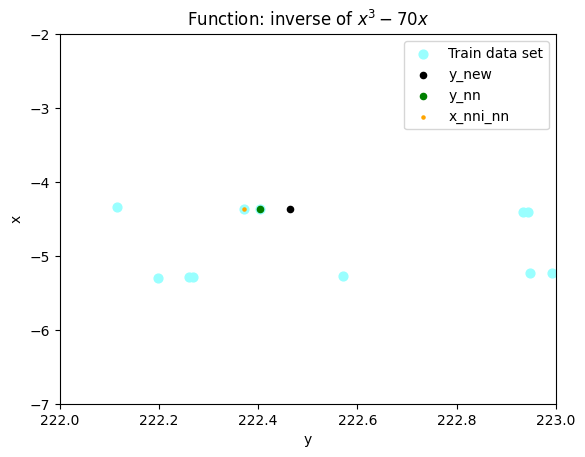

In [351]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single),
            label='Train data set', s=40, c='#99ffff')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_test_single[y_new_index]),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_test_single[y_new_index]),
            label='y_new', s=20, c='black')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=20, c='green')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn', s=5, c='orange')

plt.xlim([222, 223])
plt.ylim([-7, -2])
plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [352]:
x_pred_nni_nn = []

In [353]:
# while len(x_nni_nn) > 0:  # consumir los anchors dentro del circulo naranja al hacer sub-circulos rojos

In [354]:
j_random = np.random.randint(len(x_nni_nn))      # get random point from anchors
j_random

0

In [355]:
x_nni_nnj_nn_indexes = tnnr_nn_test_64_fnorm.get_nearest_neighbors(x_nni_nn[j_random].reshape(-1, 1),
                                                                   x_nni_nn.reshape(-1, 1),
                                                                   1)  # one neighbor

x_nni_nnj_nn_indexes

array([[0]])

In [356]:
# if len(x_nni_nnj_nn_indexes[0]) >= 1:

In [357]:
x_nni_nnj_nn = x_nni_nn[x_nni_nnj_nn_indexes[0]]  # points inside red circle
y_nni_nnj_nn = y_nni_nn[x_nni_nnj_nn_indexes[0]]

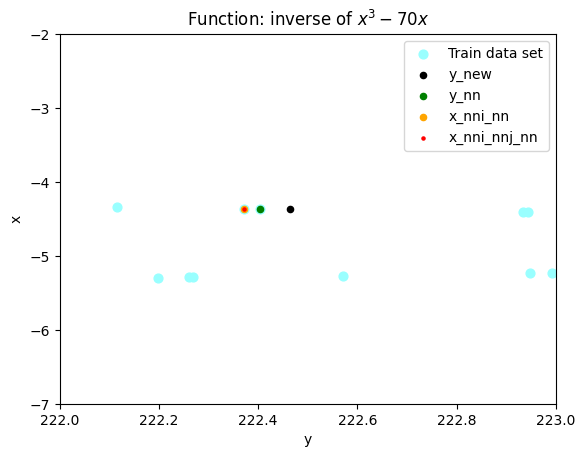

In [358]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single),
            label='Train data set', s=40, c='#99ffff')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_test_single[y_new_index]),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_test_single[y_new_index]),
            label='y_new', s=20, c='black')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nn),
            label='y_nn', s=20, c='green')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nni_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nni_nn),
            label='x_nni_nn', s=20, c='orange')

plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(y_nni_nnj_nn),
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_nni_nnj_nn),
            label='x_nni_nnj_nn', s=5, c='red')

plt.xlim([222, 223])
plt.ylim([-7, -2])
plt.title('Function: inverse of $x^3 - 70x$')
plt.xlabel('y')
plt.ylabel('x')
plt.legend()

In [359]:
#pair_b = np.array([y_nni_nn[j_random]] * len(y_nni_nnj_nn))
pair_b = np.array([tnnr_nn_test_64_fnorm.y_test_single[y_new_index]] * len(y_nni_nnj_nn))

diff_a = tnnr_nn_test_64_fnorm.model.predict([pair_b, y_nni_nnj_nn], 
                                             verbose=tnnr_nn_test_64_fnorm.verbosity).flatten()

diff_b = tnnr_nn_test_64_fnorm.model.predict([y_nni_nnj_nn, pair_b], 
                                             verbose=tnnr_nn_test_64_fnorm.verbosity).flatten()

pair_b

array([0.75570204])

In [360]:
diff_a

array([1.6002683e-05], dtype=float32)

In [361]:
diff_b

array([-2.7384609e-05], dtype=float32)

In [362]:
diff_a - diff_b

array([4.3387292e-05], dtype=float32)

In [363]:
x_pred_nni_nn.append(np.average(0.5 * diff_a - 0.5 * diff_b + x_nni_nnj_nn, weights=None))

In [364]:
x_pred_nni_nn

[-0.41728802780890006]

In [365]:
x_mse_test_per_cluster.append((x_pred_nni_nn[-1] - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]) ** 2)

In [366]:
x_mse_test_per_cluster

[array([5.60388243e-07])]

In [367]:
x_pred_nni_nn

[-0.41728802780890006]

In [368]:
tnnr_nn_test_64_fnorm.x_test_single[y_new_index]

array([-0.41803662])

In [369]:
x_pred_nni_nn - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]

array([0.00074859])

In [370]:
(x_pred_nni_nn - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]) ** 2

array([5.60388243e-07])

In [371]:
# remove the used anchors: from x_nni_nn remove with x_nni_nnj_nn_indexes
# x_nni_nn = np.delete(x_nni_nn, x_nni_nnj_nn_indexes[0])
# y_nni_nn = np.delete(y_nni_nn, x_nni_nnj_nn_indexes[0])

In [372]:
x_pred_test.append(np.average(x_pred_nni_nn))

In [373]:
x_pred_test

[-0.41728802780890006]

In [374]:
x_pred_nni_nn

[-0.41728802780890006]

In [375]:
y_nn[i]

0.7554847237443233

In [376]:
# y_new

tnnr_nn_test_64_fnorm.y_test_single[y_new_index]

0.7557020427775977

In [377]:
#y_pred_test.append(y_nn[i])
y_pred_test.append(tnnr_nn_test_64_fnorm.y_test_single[y_new_index])
                                                                # CAMBIO!!! -> (usar la y_new) ######################
                                                                # (igual no, pero checar)

In [378]:
y_pred_test

[0.7557020427775977]

In [379]:
# A) compare with the x_new_true
x_mse_test.append((x_pred_test[-1] - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]) ** 2)

In [380]:
x_mse_test

[array([5.60388243e-07])]

In [381]:
x_pred_test[-1]

-0.41728802780890006

In [382]:
tnnr_nn_test_64_fnorm.x_test_single[y_new_index]

array([-0.41803662])

In [383]:
x_pred_test - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]

array([0.00074859])

In [384]:
(x_pred_test - tnnr_nn_test_64_fnorm.x_test_single[y_new_index]) ** 2

array([5.60388243e-07])

In [385]:
# B) transfer the measurement of the RMSE back to the y-space by applying the original function
#x_mse_test_back_to_y.append(
#    (tnnr_nn_test_64_fnorm.f(x_pred_test[-1]) - 
#     tnnr_nn_test_64_fnorm.f(tnnr_nn_test_64_fnorm.x_test_single[y_new_index])) ** 2)

# le estoy aplicando 'f' al valor transformado, debe ser al no transformado 
                                              # CAMBIO!!! -> (aplicar transformación a las xs) ######################

x_mse_test_back_to_y.append(
    (tnnr_nn_test_64_fnorm.f(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(x_pred_test[-1])) - 
     tnnr_nn_test_64_fnorm.f(
         tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(
             tnnr_nn_test_64_fnorm.x_test_single[y_new_index]))) ** 2)

In [386]:
x_mse_test_back_to_y

[array([0.00934342])]

In [387]:
tnnr_nn_test_64_fnorm.f(x_pred_test[-1])

29.13749987521314

In [388]:
tnnr_nn_test_64_fnorm.f(tnnr_nn_test_64_fnorm.x_test_single[y_new_index])

array([29.18950948])

In [389]:
tnnr_nn_test_64_fnorm.f(x_pred_test[-1]) - tnnr_nn_test_64_fnorm.f(tnnr_nn_test_64_fnorm.x_test_single[y_new_index])

array([-0.0520096])

In [390]:
(tnnr_nn_test_64_fnorm.f(x_pred_test[-1]) - 
 tnnr_nn_test_64_fnorm.f(tnnr_nn_test_64_fnorm.x_test_single[y_new_index])) ** 2

array([0.002705])

In [391]:
# C) take the lowest point-wise RMSE that we get from all anchors before averaging
x_mse_test_min_clusters.append(np.min(x_mse_test_per_cluster))

In [392]:
x_mse_test_min_clusters

[5.603882432101846e-07]

In [393]:
x_mse_test_per_cluster

[array([5.60388243e-07])]

In [394]:
x_pred_test

[-0.41728802780890006]

In [395]:
y_pred_test

[0.7557020427775977]

In [396]:
x_pred_test = tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(np.array(x_pred_test))
y_pred_test = tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(np.array(y_pred_test))

In [397]:
x_pred_test[0]

-4.363880556971569

In [398]:
b = tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_test_single[y_new_index])[0]

In [399]:
x_pred_test[0] - b  # solo estoy viendo, no se necesita este calculo

0.007569120736325985

In [400]:
(x_pred_test[0] - b) ** 2  # solo estoy viendo, no se necesita este calculo

5.729158872108002e-05

In [401]:
# esta valor no coincide con lo calculado previamente
tnnr_nn_test_64_fnorm.cn_transformer.transform_x((x_pred_test[0] - b) ** 2)

array([0.01430819])

In [402]:
# esta valor si coincide con lo calculado previamente
(tnnr_nn_test_64_fnorm.cn_transformer.transform_x(x_pred_test[0]) - tnnr_nn_test_64_fnorm.cn_transformer.transform_x(b)) ** 2

array([5.60388243e-07])

In [403]:
y_pred_test[0]

222.4649438343232

In [404]:
tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_test_single[y_new_index])

222.4649438343232

In [405]:
x_mse_test = np.array(x_mse_test) * tnnr_nn_test_64_fnorm.cn_transformer.x_max ** 2

# x_mse_test_back_to_y = np.array(x_mse_test_back_to_y) * tnnr_nn_test_64_fnorm.cn_transformer.y_max ** 2
# (ya no es necesario porque lo transforme para calcular su f, tons ya esta en los numeros originales)
                                                                   # CAMBIO!!! -> (comentar) ######################

x_mse_test_min_clusters = np.array(x_mse_test_min_clusters) * tnnr_nn_test_64_fnorm.cn_transformer.x_max ** 2

In [406]:
x_mse_test

array([[5.72915887e-05]])

In [407]:
x_mse_test_back_to_y

[array([0.00934342])]

In [408]:
x_mse_test_min_clusters

array([5.72915887e-05])